# Analyze multiple subjects

As I said in the file before, analyzing multiple subjects is like looping over all of them. In this case, we can also loop over the four runs we did because the analysis is completely independent between subjects **and** blocks.

Because it would require too much space here, I only provide the processed data (i.e. after boosting and correlation) here. If you are interested, I am happy to give you access to all the data and the full code. Just let me know.

But let's start....

In [36]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

#%matplotlib qt

## Where is the data?

The processed data is in `data_in_git/boosting_results`. Every subject has its own folder. Some folders are empty which means that the subject could not be processed for a variety of reasons...

Whatever, lets load one that we know exists and take a look inside....

In [37]:
data = joblib.load('data_in_git/boosting_results/19950626ajht/19950626ajht__block_nr_2__maxfilter_True.dat')

We have some boosting results in there...

In [38]:
data['boosting']

idx    subject_id  is_target_speaker target_speaker_gender   
0     0  19950626ajht               True                female  \
1     0  19950626ajht               True                female   
2     0  19950626ajht               True                female   
3     0  19950626ajht               True                female   
4     0  19950626ajht               True                female   
5     0  19950626ajht               True                female   
6     0  19950626ajht               True                female   
7     0  19950626ajht               True                female   
8     0  19950626ajht               True                female   
9     0  19950626ajht               True                female   
10    0  19950626ajht               True                female   
11    0  19950626ajht               True                female   
12    0  19950626ajht               True                female   
13    0  19950626ajht               True                female   
14    0  19950626ajht               True                female   
15    0  19950626ajht               True                female   
16    0  19950626ajht               True                female   
17    0  19950626ajht               True                female   
18    0  19950626ajht               True                female   
19    0  19950626ajht               True                female   
20    1  19950626ajht               True                female   
21    1  19950626ajht               True                female   
22    1  19950626ajht               True                female   
23    1  19950626ajht               True                female   
24    1  19950626ajht               True                female   
25    1  19950626ajht               True                female   
26    1  19950626ajht               True                female   
27    1  19950626ajht               True                female   
28    1  19950626ajht               True                female   
29    1  19950626ajht               True                female   

   target_speaker_filename  has_distractor distractor_filename   
0                2_1_f.wav            True           2_3_f.wav  \
1                2_1_f.wav            True           2_3_f.wav   
2                2_1_f.wav            True           2_3_f.wav   
3                2_1_f.wav            True           2_3_f.wav   
4                2_1_f.wav            True           2_3_f.wav   
5                2_1_f.wav            True           2_3_f.wav   
6                2_1_f.wav            True           2_3_f.wav   
7                2_1_f.wav            True           2_3_f.wav   
8                2_1_f.wav            True           2_3_f.wav   
9                2_1_f.wav            True           2_3_f.wav   
10               2_1_f.wav            True           2_3_f.wav   
11               2_1_f.wav            True           2_3_f.wav   
12               2_1_f.wav            True           2_3_f.wav   
13               2_1_f.wav            True           2_3_f.wav   
14               2_1_f.wav            True           2_3_f.wav   
15               2_1_f.wav            True           2_3_f.wav   
16               2_1_f.wav            True           2_3_f.wav   
17               2_1_f.wav            True           2_3_f.wav   
18               2_1_f.wav            True           2_3_f.wav   
19               2_1_f.wav            True           2_3_f.wav   
20               2_2_f.wav           False                None   
21               2_2_f.wav           False                None   
22               2_2_f.wav           False                None   
23               2_2_f.wav           False                None   
24               2_2_f.wav           False                None   
25               2_2_f.wav           False                None   
26               2_2_f.wav           False                None   
27               2_2_f.wav           False                None   
28               2_2_f.wav           False 

And also some correlation with real eye tracker results...

In [39]:
data['corr']

idx    subject_id  is_target_speaker target_speaker_gender   
0    0  19950626ajht               True                female  \
1    0  19950626ajht               True                female   
2    0  19950626ajht               True                female   
3    1  19950626ajht               True                female   
4    1  19950626ajht               True                female   
5    1  19950626ajht               True                female   

  target_speaker_filename  has_distractor distractor_filename   
0               2_1_f.wav            True           2_3_f.wav  \
1               2_1_f.wav            True           2_3_f.wav   
2               2_1_f.wav            True           2_3_f.wav   
3               2_2_f.wav           False                None   
4               2_2_f.wav           False                None   
5               2_2_f.wav           False                None   

  distractor_speaker_gender  stop_sample  stop_rel_time   
0                      male       336847        202.180  \
1                      male       336847        202.180   
2                      male       336847        202.180   
3                      None       618322        210.105   
4                      None       618322        210.105   
5                      None       618322        210.105   

   distractor_onset_sample data_type      corr  
0                 154677.0   est_meg  0.198242  
1                 154677.0   est_eog  0.293974  
2                 154677.0   est_ica  0.145415  
3                      NaN   est_meg  0.105010  
4                      NaN   est_eog  0.200146  
5                      NaN   est_ica  0.060898

## Let's load all of them...
Here is what we want to do:

1. Look at every folder in `data_in_git/boosting_results`.
2. If there are `.dat` files in there, we want to open each one and read the data
3. All data should go into one big `DataFrame`.

We could code this all by hand, but luckily, we have some nice helpers.

The first one is `pathlib`, a standard python library that makes it easy to work with paths, including searching inside them.

The second one is the excellent `pandas` library that allows us to work with this kind of multi-factor data.

In [40]:
all_dat_files = list(Path('data_in_git/boosting_results/').rglob('**/*.dat'))

# We will put all the raw results into lists for now and concatenate them later. It is just easier like this
all_boosting = list()
all_corr = list()

for cur_file in all_dat_files:
    cur_data = joblib.load(cur_file)
    cur_block = int(cur_file.stem.split('__')[1][-1])
    cur_boosting = cur_data['boosting'].query('boosting=="decoding"')
    cur_corr = cur_data['corr']
    cur_boosting['presentation_idx'] = (cur_boosting['idx'] + 1) + (2 * (cur_block-1))
    cur_corr['presentation_idx'] = (cur_corr['idx'] + 1) + (2 * (cur_block-1))
    all_boosting.append(cur_boosting)
    all_corr.append(cur_corr)

/tmp/ipykernel_11203/2717836328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_boosting['presentation_idx'] = (cur_boosting['idx'] + 1) + (2 * (cur_block-1))
/tmp/ipykernel_11203/2717836328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_boosting['presentation_idx'] = (cur_boosting['idx'] + 1) + (2 * (cur_block-1))
/tmp/ipykernel_11203/2717836328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Ok, lets combine those...

In [41]:
df_boosting = pd.concat(all_boosting, axis=0)
df_corr = pd.concat(all_corr, axis=0)

## Some pandas awesomeness...
pandas is very powerful. It lets you do all kinds of operations on your tables. For example, let's look at correlation. We basically want to group by the `data_type` column... So let's do this...

In [42]:
df_corr.groupby('data_type')['corr'].mean()

data_type
est_eog    0.230912
est_ica    0.080956
est_meg    0.122392
Name: corr, dtype: float64

In [43]:
results = df_boosting.groupby(['used_envelope', 'has_distractor', 'data_type'])['r'].mean()
results = pd.DataFrame(results)

results

r
used_envelope has_distractor data_type            
distractor    True           est_eog      0.031155
                             est_ica      0.029015
                             est_meg      0.029790
                             eye_tracker  0.028161
                             meg          0.030927
target        False          est_eog      0.029878
                             est_ica      0.032651
                             est_meg      0.042991
                             eye_tracker  0.029849
                             meg          0.190310
              True           est_eog      0.029558
                             est_ica      0.026647
                             est_meg      0.032510
                             eye_tracker  0.045972
                             meg          0.095867

<Axes: xlabel='used_envelope,has_distractor,data_type'>

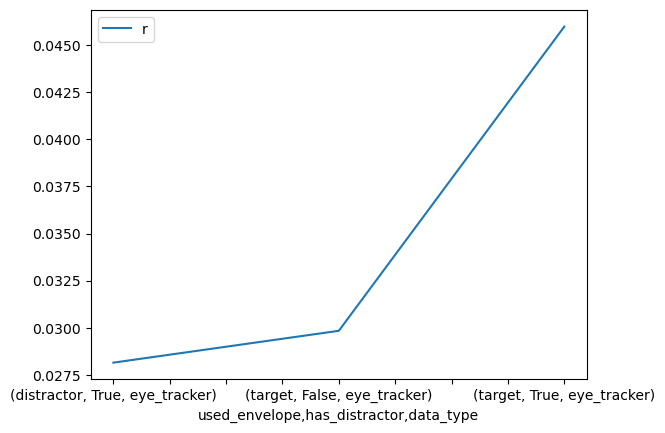

In [44]:
results.query('data_type=="eye_tracker"').plot()

## Let's make some excel lists for you...

In [45]:
df_boosting[['presentation_idx', 'subject_id', 'has_distractor', 'data_type', 'used_envelope', 'r']].to_excel('data_in_git/boosting.xlsx')
df_corr[['presentation_idx', 'subject_id', 'data_type', 'corr']].to_excel('data_in_git/corr.xlsx')

In [46]:
df_boosting

idx    subject_id  is_target_speaker target_speaker_gender   
0     0  19950626ajht               True                female  \
2     0  19950626ajht               True                female   
4     0  19950626ajht               True                female   
6     0  19950626ajht               True                female   
8     0  19950626ajht               True                female   
..  ...           ...                ...                   ...   
20    1  20020924crlk               True                  male   
22    1  20020924crlk               True                  male   
24    1  20020924crlk               True                  male   
26    1  20020924crlk               True                  male   
28    1  20020924crlk               True                  male   

   target_speaker_filename  has_distractor distractor_filename   
0                1_1_f.wav           False                None  \
2                1_1_f.wav           False                None   
4                1_1_f.wav           False                None   
6                1_1_f.wav           False                None   
8                1_1_f.wav           False                None   
..                     ...             ...                 ...   
20               4_2_m.wav           False                None   
22               4_2_m.wav           False                None   
24               4_2_m.wav           False                None   
26               4_2_m.wav           False                None   
28               4_2_m.wav           False                None   

   distractor_speaker_gender  stop_sample  stop_rel_time   
0                       None       285381        183.091  \
2                       None       285381        183.091   
4                       None       285381        183.091   
6                       None       285381        183.091   
8                       None       285381        183.091   
..                       ...          ...            ...   
20                      None       520720        195.967   
22                      None       520720        195.967   
24                      None       520720        195.967   
26                      None       520720        195.967   
28                      None       520720        195.967   

    distractor_onset_sample    data_type  boosting used_envelope   
0                       NaN      est_meg  decoding        target  \
2                       NaN      est_eog  decoding        target   
4                       NaN      est_ica  decoding        target   
6                       NaN          meg  decoding        target   
8                       NaN  eye_tracker  decoding        target   
..                      ...          ...       ...           ...   
20                      NaN      est_meg  decoding        target   
22                      NaN      est_eog  decoding        target   
24                      NaN      est_ica  decoding        target   
26                      NaN          meg  decoding        target   
28                      NaN  eye_tracker  decoding        target   

                                     boosting_results         r   
0   <boosting target_envelope ~ None, -0.4 - 0.1, ...  0.039827  \
2   <boosting target_envelope ~ None, -0.4 - 0.1, ...  0.016669   
4   <boosting target_envelope ~ None, -0.4 - 0.1, ...  0.031805   
6   <boosting target_envelope ~ brain, -0.4 - 0.1,...  0.211833   
8   <boosting target_envelope ~ None, -0.4 - 0.1, ...  0.032685   
..                                                ...       ...   
20  <boosting target_envelope ~ None, -0.4 - 0.1, ...  0.022585   
22  <boosting target_envelope ~ None, -0.4 - 0.1, ...  0.030591   
24  <boosting target_envelope ~ None, -0.4 - 0.1, ...  0.000136   
26  <boosting target_envelope ~ brain, -0.4 - 0.1,...  0.273205   
28  <boosting target_envelope ~ None, -0.4 - 0.1, ...  0.063712   

    presentation_idx  
0                  1  
2                  1  
4     